# Homework set 8

In [291]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
def rho(x,y):
    # Probablity density function 
    V = (x-y)**4 + abs(x + y - 6)
    return np.exp(-V)

In [256]:
# Contor plot of the pdf
xx = np.linspace(0,6,100)
yy = np.linspace(0,6,100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rho(XX, YY)

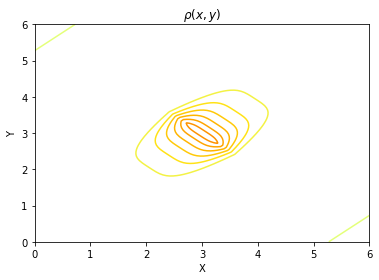

In [272]:
plt.contour(XX, YY, ZZ, cmap = 'Wistia')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(r'$\rho(x, y)$')
plt.show()

In [273]:
# Initial configuration
u0 = np.matrix([[0], [0]])
a = 1
dim = 2
covariance = np.matrix([[a, 0], [0, a]])
A = np.linalg.cholesky(covariance)
mu = u0

In [274]:
# Sample from distribution and shift mean by previous state of Markov Chain
Z = np.random.normal(size = (d, 1))
q = A.dot(Z) + mu

In [283]:
# Define desired sample size
n = 10_0
samples = [[0,0]]

In [284]:
while len(samples) < n:
    
    # Update location of newest sample
    mu = np.matrix([[samples[-1][0]], [samples[-1][1]]])
    
    # Generate canidate
    Z = np.random.normal(size = (d, 1))
    # Shift
    q = A.dot(Z) + mu
    
    # Acceptence  rate
    alpha = rho(q[0], q[1])
    
    if np.random.uniform() < alpha:
        samples.append([q.item(0), q.item(1)])

In [285]:
xx = np.array(samples).T[0]

In [286]:
yy = np.array(samples).T[1]

In [287]:
XX, YY = np.meshgrid(xx, yy)

In [288]:
Z = rho(XX, YY)

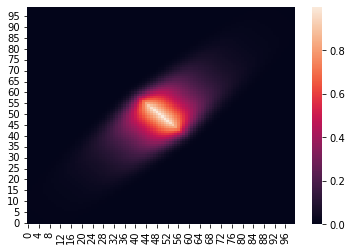

In [295]:
ax = sns.heatmap(ZZ)
ax.invert_yaxis()

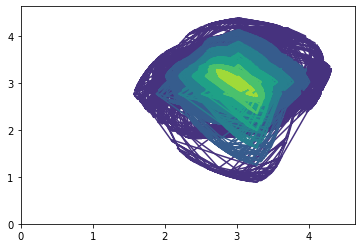

In [290]:
plt.contour(xx, yy, Z, )

## Fine tune a until acceptence ratio 30%

## Roling mean plots